# Holiday Package Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning

## Handling Missing Values

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [8]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [11]:
# Finding the percentage of missing values for each feature
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [13]:
#statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values

1. Impute Median for age
2. Impute mode for TypeOfContact
3. Impute Median for Durationofpitch
4. Impute Mode for NumberOfFollowups
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberOfTrips
7. Impute Mode for NumberOfChildernVisiting
7. Impute Median for MonthlyIncome

In [24]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)

#TypeOfContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#Durationofpitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#NumberOfChildernVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#MontlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [25]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [26]:
df.drop('CustomerID',inplace=True,axis=1)

## FeatureEngineering

In [27]:
#creating new column feature
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], inplace=True, axis=1)

In [29]:
#get all numeric features
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Num of Numerical features :',len(num_features))

Num of Numerical features : 12


In [30]:
#categorical_features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of Categorical features: ', len(cat_features))

Num of Categorical features:  6


In [32]:
#Discrete features
discrete_features=[features for features in df.columns if len(df[features].unique())<=25]
print('Num of discrete features: ',len(discrete_features))

Num of discrete features:  15


In [33]:
# Continuos features
cont_features=[features for features in df.columns if features not in discrete_features]
print('Num of continuous features: ',len(cont_features))

Num of continuous features:  3


In [34]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [35]:
X=df.drop(['ProdTaken'], axis=1)
y=df['ProdTaken']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)

(3910, 17)
(978, 17)


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [42]:
df['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [43]:
df['Occupation'].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [47]:
# create column transformers
cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features)
]
)

In [48]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [49]:
X_train=preprocessor.fit_transform(X_train)

In [50]:
X_test=preprocessor.transform(X_test)

In [51]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [52]:
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 0.        ,  1.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

## RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [66]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    # Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    #Test Set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average="weighted")
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    print('Model Performance for Training set')
    print("-Accuracy: {:.4f}".format(model_train_accuracy))
    print("-F1 Score: {:.4f}".format(model_train_f1))
    print("-Precision: {:.4f}".format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')



Logistic Regression
Model Performance for Training set
-Accuracy: 0.8463
-F1 Score: 0.8208
-Precision: 0.7013
- Recall: 0.3059
- Roc Auc Score: 0.6380
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


Decision Tree
Model Performance for Training set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9202
- F1 score: 0.9187
- Precision: 0.8266
- Recall: 0.7487
- Roc Auc Score: 0.8553


Random Forest
Model Performance for Training set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9223
- F1 score: 0.9152
- Precision: 0.9752
- Recall: 0.6178
- Roc Auc Score: 0.8070


Gradient Boost
Model Performance for Training set
-Accurac

In [58]:
list(models)

['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

## Hyperparameter tuning

In [67]:
rf_params={
    "max_depth":[5,8,15, None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [68]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [69]:
random_cv_models=[
    ("RF",RandomForestClassifier(),rf_params)
]

In [70]:
random_cv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [73]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name, model, model_param in random_cv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=model_param,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-----Best Params for {model_name}----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----Best Params for max_depth----------
[5, 8, 15, None, 10]
-----Best Params for max_features----------
[5, 7, 'auto', 8]
-----Best Params for min_samples_split----------
[2, 8, 15, 20]
-----Best Params for n_estimators----------
[100, 200, 500, 1000]
-----Best Params for RF----------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [74]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9356
- F1 score: 0.9313
- Precision: 0.9706
- Recall: 0.6911
- Roc Auc Score: 0.8430


[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total

[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=500; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth

[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=1000; total time=   2.5s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_d

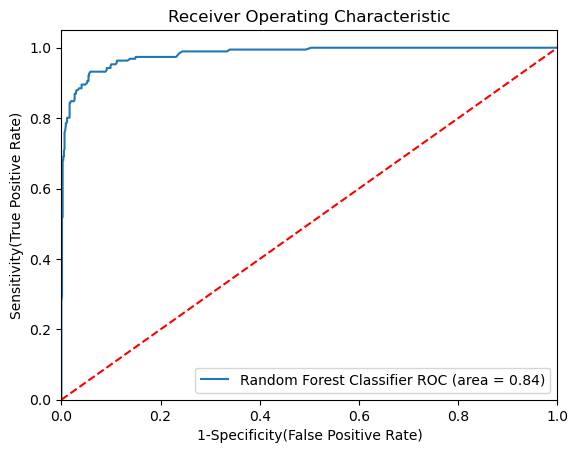

In [75]:
# Plotting ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

auc_models=[
    {
    'label':'Random Forest Classifier',
    'model':RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None),
    'auc':0.8430}
]

# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 